**Imprtation des librairies**

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn




**Importation des données**

In [62]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [63]:
data = '/content/drive/MyDrive/data.xlsx'
data_df = pd.read_excel(data)
data_df

,REGION,HANDSET,groupe_offre,CODE_CONTRAT,OFFRE,ANC_MOIS,revenu_cdr,revenu_sms,revenu_voix,revenu_inter,revenu_roaming,revenu_inter_roaming,DUREE_APPEL_TOT,Duree_offnet_tot,MNT_FORFAIT_DATA,FREQ_USSD,ARPU,ARPM,P_revenu_data,NB_RECH,P_N_Rech_sup5,MNT_RECH,Rech_Moy,NB_JR_RECH,FREQ_RECH,P_Dur_Offnet,NB_JOUR_ACT_IN,DUREE_APPEL_IN,role,VOLUME_SESSION,NB_CHANG_STATUT_OFFRE,AVG_J_S,P_DUR_STAT_S,P_FF_Journalier,P_FF_mensuel,revenu_sms_plus,revenu_gaming
0,Ben Arous,2G,Offre à bonus,XX_66322673,PRE - TT 1000%,74,0.94,0.25,0.69,0.0,0.0,0.0,1.66,0.00,0.00,185.00,0.94,0.42,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.00,10.333,0.960,Member,0.00,0,0.00,0.00,0.00,0.00,0.00,0.0
1,Ben Arous,4G,35mil/min,XX_3656914,PRE - Trankil TT,241,1.09,0.32,0.77,0.0,0.0,0.0,15.98,2.92,0.75,176.47,1.84,0.05,0.41,0.17,0.17,0.83,4.88,0.17,176.47,0.18,22.333,23.022,Follower,136.90,0,0.00,0.00,0.00,0.17,0.30,0.0
2,Ben Arous,4G,Offre à bonus,XX_15327574,PRE - TT 1000%,61,0.33,0.00,0.33,0.0,0.0,0.0,1.68,1.63,0.00,185.00,0.33,0.20,0.00,0.33,0.00,0.33,1.00,0.33,90.91,0.97,8.667,0.322,Member,0.00,1,0.00,0.00,0.00,0.00,0.00,0.0
3,Bizerte,2G,Offre à bonus,XX_73220184,PRE - Oulidha 1000%,76,1.21,0.00,0.84,0.0,0.0,0.0,6.01,4.21,0.00,185.00,1.21,0.14,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.70,24.500,51.518,Member,0.00,0,0.00,0.00,0.00,0.00,0.34,0.0
4,Gabes,4G,Offre à bonus,XX_6802527,PRE - TT 1500%,152,0.11,0.00,0.11,0.0,0.0,0.0,2.59,2.59,0.00,185.00,0.11,0.04,0.00,0.17,0.00,0.17,1.00,0.17,176.47,1.00,1.833,9.910,NaN,0.01,1,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Jendouba,4G,35mil/min,XX_63145839,PRE - Trankil TT,11,0.18,0.00,0.18,0.0,0.0,0.0,4.88,4.82,0.00,185.00,0.18,0.04,0.00,0.33,0.00,0.33,1.00,0.17,176.47,0.99,0.167,0.000,NaN,0.00,3,20.00,0.44,0.00,0.00,0.00,0.0
9996,Jendouba,4G,35mil/min,XX_89245981,PRE - Jawhara 35Mil,10,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,185.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,185.00,0.00,2.000,0.000,NaN,0.00,3,20.25,0.45,0.00,0.00,0.00,0.0
9997,Jendouba,4G,35mil/min,XX_40546250,PRE - Trankil TT,8,0.22,0.00,0.22,0.0,0.0,0.0,5.43,0.26,0.15,176.47,0.37,0.04,0.41,0.67,0.00,0.67,1.00,0.67,44.78,0.05,28.000,797.770,Leader,0.00,8,15.00,0.75,0.17,0.00,0.00,0.0
9998,Jendouba,4G,Hayya,XX_32410106,Hayya,114,0.71,0.00,0.71,0.0,0.0,0.0,9.12,3.15,0.00,185.00,0.71,0.08,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.35,2.500,2.395,Outlier,0.00,3,15.00,0.33,0.00,0.00,0.00,0.0


In [55]:
data_df.shape

(10000, 37)

In [56]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REGION                 10000 non-null  object 
 1   HANDSET                10000 non-null  object 
 2   groupe_offre           8767 non-null   object 
 3   CODE_CONTRAT           10000 non-null  object 
 4   OFFRE                  10000 non-null  object 
 5   ANC_MOIS               10000 non-null  int64  
 6   revenu_cdr             10000 non-null  float64
 7   revenu_sms             10000 non-null  float64
 8   revenu_voix            10000 non-null  float64
 9   revenu_inter           10000 non-null  float64
 10  revenu_roaming         10000 non-null  float64
 11  revenu_inter_roaming   10000 non-null  float64
 12  DUREE_APPEL_TOT        10000 non-null  float64
 13  Duree_offnet_tot       10000 non-null  float64
 14  MNT_FORFAIT_DATA       10000 non-null  float64
 15  FRE

In [57]:
data_df.isnull().sum().sort_values(ascending=False).head()

role             2443
groupe_offre     1233
ARPM              295
revenu_gaming       0
revenu_inter        0
dtype: int64

In [58]:
data_df.describe()

,ANC_MOIS,revenu_cdr,revenu_sms,revenu_voix,revenu_inter,revenu_roaming,revenu_inter_roaming,DUREE_APPEL_TOT,Duree_offnet_tot,MNT_FORFAIT_DATA,FREQ_USSD,ARPU,ARPM,P_revenu_data,NB_RECH,P_N_Rech_sup5,MNT_RECH,Rech_Moy,NB_JR_RECH,FREQ_RECH,P_Dur_Offnet,NB_JOUR_ACT_IN,DUREE_APPEL_IN,VOLUME_SESSION,NB_CHANG_STATUT_OFFRE,AVG_J_S,P_DUR_STAT_S,P_FF_Journalier,P_FF_mensuel,revenu_sms_plus,revenu_gaming
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9705.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,84.790500,0.747732,0.043286,0.697319,0.017038,0.003188,0.020226,7.544676,3.636619,0.110637,165.159373,0.866108,0.131296,0.117341,0.700349,0.132755,1.303485,2.587189,0.683275,80.479087,0.423144,13.794199,50.021904,23.147719,5.515300,7.882435,0.309395,0.052376,0.005435,0.028672,0.013833
std,81.050591,0.583381,0.123813,0.586510,0.109313,0.052988,0.126095,5.816728,3.882987,0.289782,47.476822,0.592116,0.306134,0.263123,0.618484,0.151777,0.792966,2.045851,0.601973,57.713257,0.304821,8.092374,168.047919,66.768903,4.331794,6.490841,0.246420,0.142792,0.030002,0.091714,0.063059
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.220000,0.000000,0.150000,0.000000,0.000000,0.000000,2.310000,0.460000,0.000000,185.000000,0.330000,0.040000,0.000000,0.330000,0.000000,0.830000,1.000000,0.330000,30.000000,0.150000,7.333000,2.358000,0.000000,2.000000,3.000000,0.080000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.690000,0.000000,0.610000,0.000000,0.000000,0.000000,6.660000,2.360000,0.000000,185.000000,0.830000,0.080000,0.000000,0.500000,0.080000,1.330000,1.560000,0.500000,60.000000,0.420000,13.333000,12.399000,0.000000,4.000000,7.000000,0.290000,0.000000,0.000000,0.000000,0.000000
75%,164.000000,1.200000,0.020000,1.150000,0.000000,0.000000,0.000000,12.102500,5.580000,0.000000,185.000000,1.380000,0.150000,0.000000,1.000000,0.250000,1.670000,4.880000,1.000000,90.910000,0.680000,20.167000,41.412250,0.880000,8.000000,9.865000,0.510000,0.000000,0.000000,0.000000,0.000000
max,255.000000,1.990000,1.830000,1.990000,1.600000,1.860000,2.460000,19.990000,19.090000,1.950000,185.000000,1.990000,18.600000,1.000000,4.670000,1.000000,21.160000,20.000000,4.670000,185.000000,1.000000,30.000000,7011.933000,499.830000,54.000000,49.500000,0.930000,1.000000,0.330000,0.490000,0.480000


In [8]:
data_df.describe(include='O')

,REGION,HANDSET,groupe_offre,CODE_CONTRAT,OFFRE,role
count,10000,10000,8767,10000,10000,7557
unique,25,3,5,10000,49,5
top,Ben Arous,2G,Offre à bonus,XX_4165419,PRE - 1=11,Member
freq,974,5054,3934,1,1704,3842


In [ ]:
data_df['groupe_offre'].value_counts()

Offre à bonus    3934
ancien           1644
offre-300%       1459
35mil/min        1291
Hayya             439
Name: groupe_offre, dtype: int64

In [ ]:
data_df['role'].value_counts()

Member      3842
Follower    1840
Outlier     1081
Leader       648
Bridge       146
Name: role, dtype: int64

In [ ]:
data_df['HANDSTE'].value_counts()

2G    5054
4G    3663
3G    1283
Name: HANDSET, dtype: int64

In [5]:
data_dfcopy = data_df.copy()
data_dfcopy

,REGION,HANDSET,groupe_offre,CODE_CONTRAT,OFFRE,ANC_MOIS,revenu_cdr,revenu_sms,revenu_voix,revenu_inter,revenu_roaming,revenu_inter_roaming,DUREE_APPEL_TOT,Duree_offnet_tot,MNT_FORFAIT_DATA,FREQ_USSD,ARPU,ARPM,P_revenu_data,NB_RECH,P_N_Rech_sup5,MNT_RECH,Rech_Moy,NB_JR_RECH,FREQ_RECH,P_Dur_Offnet,NB_JOUR_ACT_IN,DUREE_APPEL_IN,role,VOLUME_SESSION,NB_CHANG_STATUT_OFFRE,AVG_J_S,P_DUR_STAT_S,P_FF_Journalier,P_FF_mensuel,revenu_sms_plus,revenu_gaming
0,Ben Arous,2G,Offre à bonus,XX_66322673,PRE - TT 1000%,74,0.94,0.25,0.69,0.0,0.0,0.0,1.66,0.00,0.00,185.00,0.94,0.42,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.00,10.333,0.960,Member,0.00,0,0.00,0.00,0.00,0.00,0.00,0.0
1,Ben Arous,4G,35mil/min,XX_3656914,PRE - Trankil TT,241,1.09,0.32,0.77,0.0,0.0,0.0,15.98,2.92,0.75,176.47,1.84,0.05,0.41,0.17,0.17,0.83,4.88,0.17,176.47,0.18,22.333,23.022,Follower,136.90,0,0.00,0.00,0.00,0.17,0.30,0.0
2,Ben Arous,4G,Offre à bonus,XX_15327574,PRE - TT 1000%,61,0.33,0.00,0.33,0.0,0.0,0.0,1.68,1.63,0.00,185.00,0.33,0.20,0.00,0.33,0.00,0.33,1.00,0.33,90.91,0.97,8.667,0.322,Member,0.00,1,0.00,0.00,0.00,0.00,0.00,0.0
3,Bizerte,2G,Offre à bonus,XX_73220184,PRE - Oulidha 1000%,76,1.21,0.00,0.84,0.0,0.0,0.0,6.01,4.21,0.00,185.00,1.21,0.14,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.70,24.500,51.518,Member,0.00,0,0.00,0.00,0.00,0.00,0.34,0.0
4,Gabes,4G,Offre à bonus,XX_6802527,PRE - TT 1500%,152,0.11,0.00,0.11,0.0,0.0,0.0,2.59,2.59,0.00,185.00,0.11,0.04,0.00,0.17,0.00,0.17,1.00,0.17,176.47,1.00,1.833,9.910,NaN,0.01,1,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Jendouba,4G,35mil/min,XX_63145839,PRE - Trankil TT,11,0.18,0.00,0.18,0.0,0.0,0.0,4.88,4.82,0.00,185.00,0.18,0.04,0.00,0.33,0.00,0.33,1.00,0.17,176.47,0.99,0.167,0.000,NaN,0.00,3,20.00,0.44,0.00,0.00,0.00,0.0
9996,Jendouba,4G,35mil/min,XX_89245981,PRE - Jawhara 35Mil,10,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,185.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,185.00,0.00,2.000,0.000,NaN,0.00,3,20.25,0.45,0.00,0.00,0.00,0.0
9997,Jendouba,4G,35mil/min,XX_40546250,PRE - Trankil TT,8,0.22,0.00,0.22,0.0,0.0,0.0,5.43,0.26,0.15,176.47,0.37,0.04,0.41,0.67,0.00,0.67,1.00,0.67,44.78,0.05,28.000,797.770,Leader,0.00,8,15.00,0.75,0.17,0.00,0.00,0.0
9998,Jendouba,4G,Hayya,XX_32410106,Hayya,114,0.71,0.00,0.71,0.0,0.0,0.0,9.12,3.15,0.00,185.00,0.71,0.08,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.35,2.500,2.395,Outlier,0.00,3,15.00,0.33,0.00,0.00,0.00,0.0


**Analyse exploratoire**

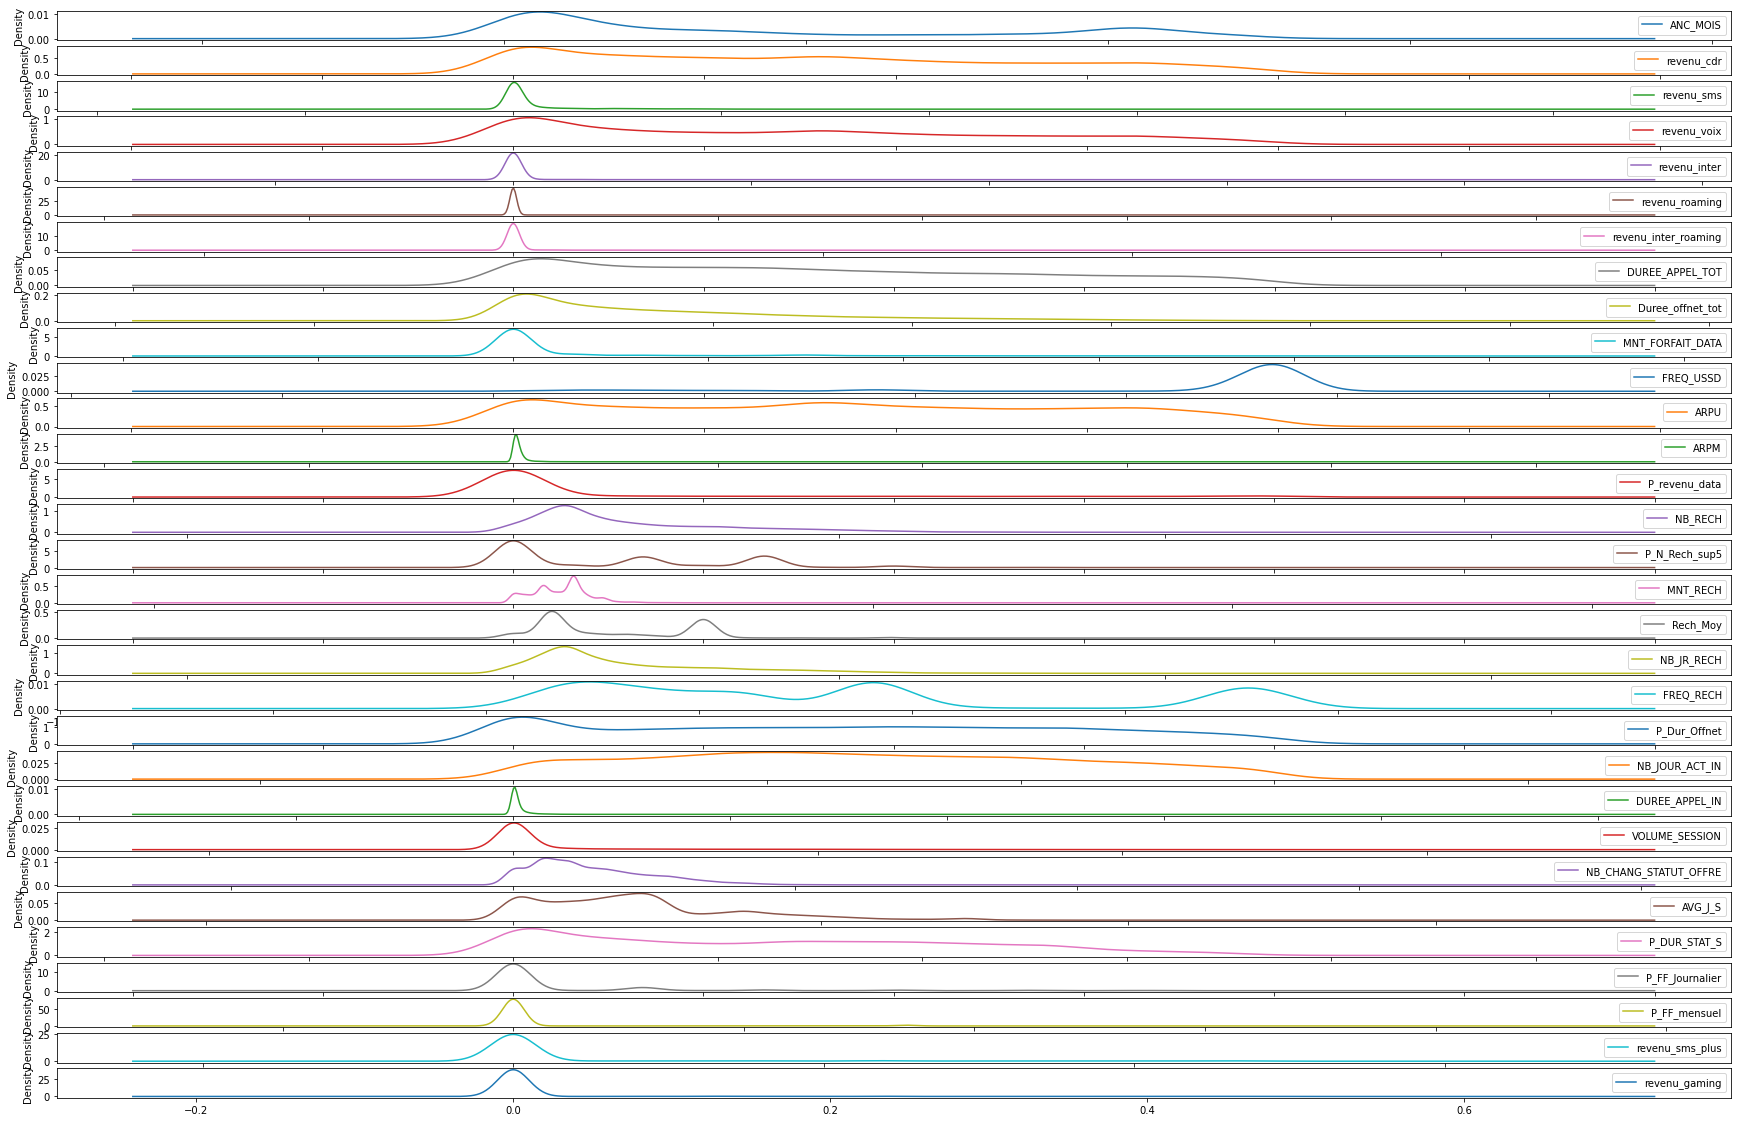

In [87]:
data_dfcopy.plot(kind='density',subplots=True,sharex=False,figsize=(30,20))
plt.show()

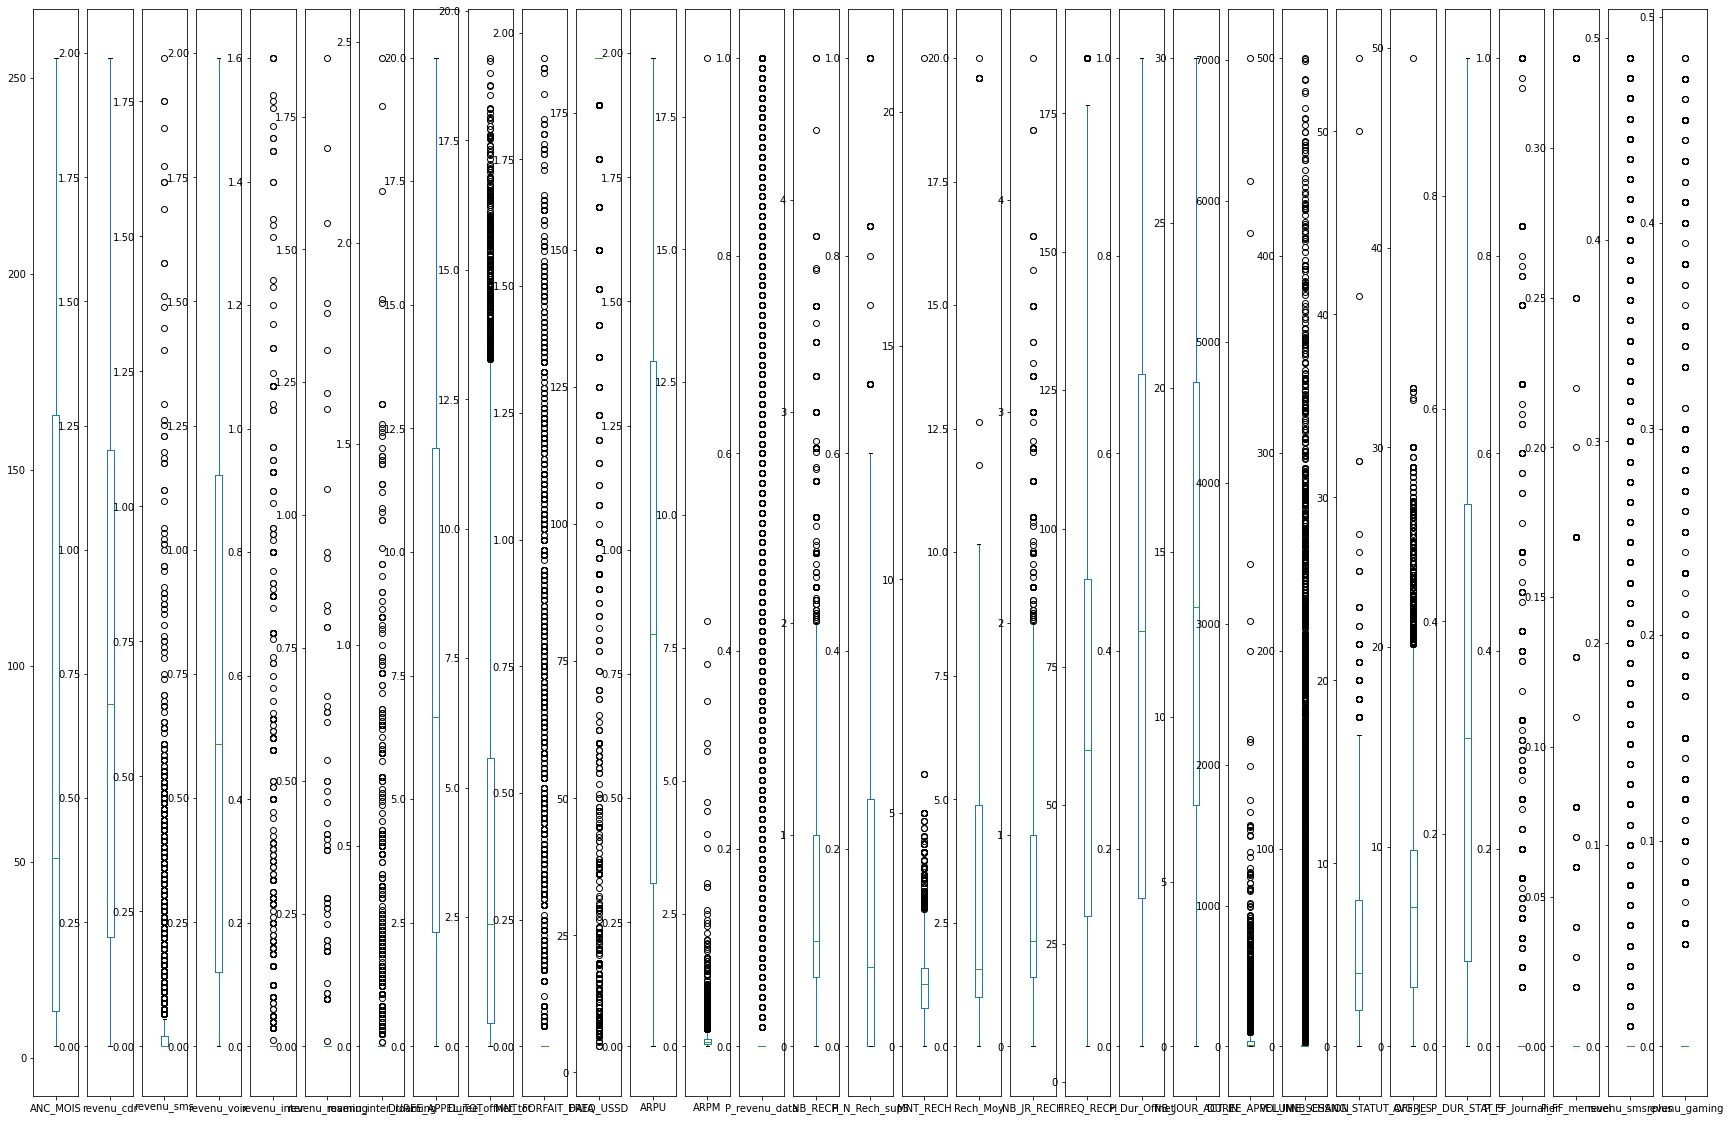

In [94]:
data_dfcopy.plot(kind='box',subplots=True,sharex=False,sharey=False , figsize=(30,20))
plt.show()

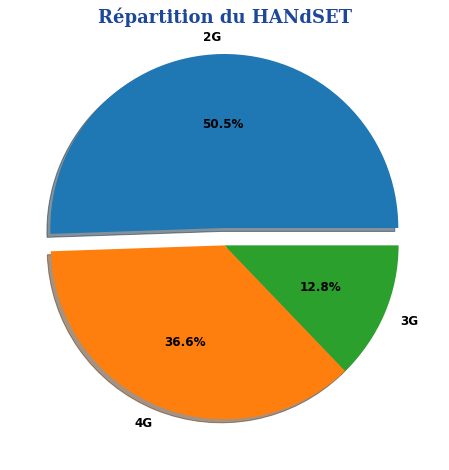

In [146]:
handsets = data_dfcopy.groupby(by='HANDSET')['CODE_CONTRAT'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(3)
explodes[0] = .1

plt.pie(handsets, labels=handsets.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition du HANdSET", fontdict=font_title)
plt.show()

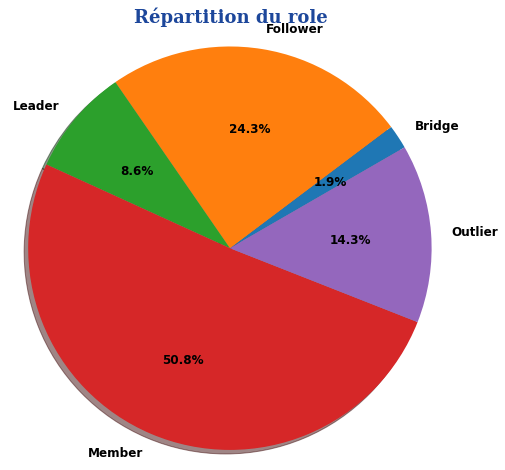

In [115]:
building_type = data_dfcopy.groupby(by='role')['CODE_CONTRAT'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition du role", fontdict=font_title)
plt.show()

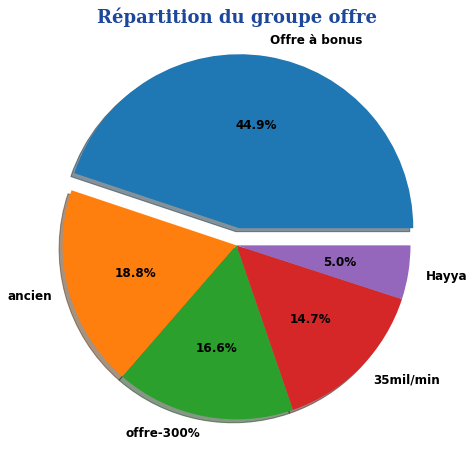

In [148]:
groupe = data_dfcopy.groupby(by='groupe_offre')['CODE_CONTRAT'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(5)
explodes[0] = .1

plt.pie(groupe, labels=groupe.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition du groupe offre", fontdict=font_title)
plt.show()

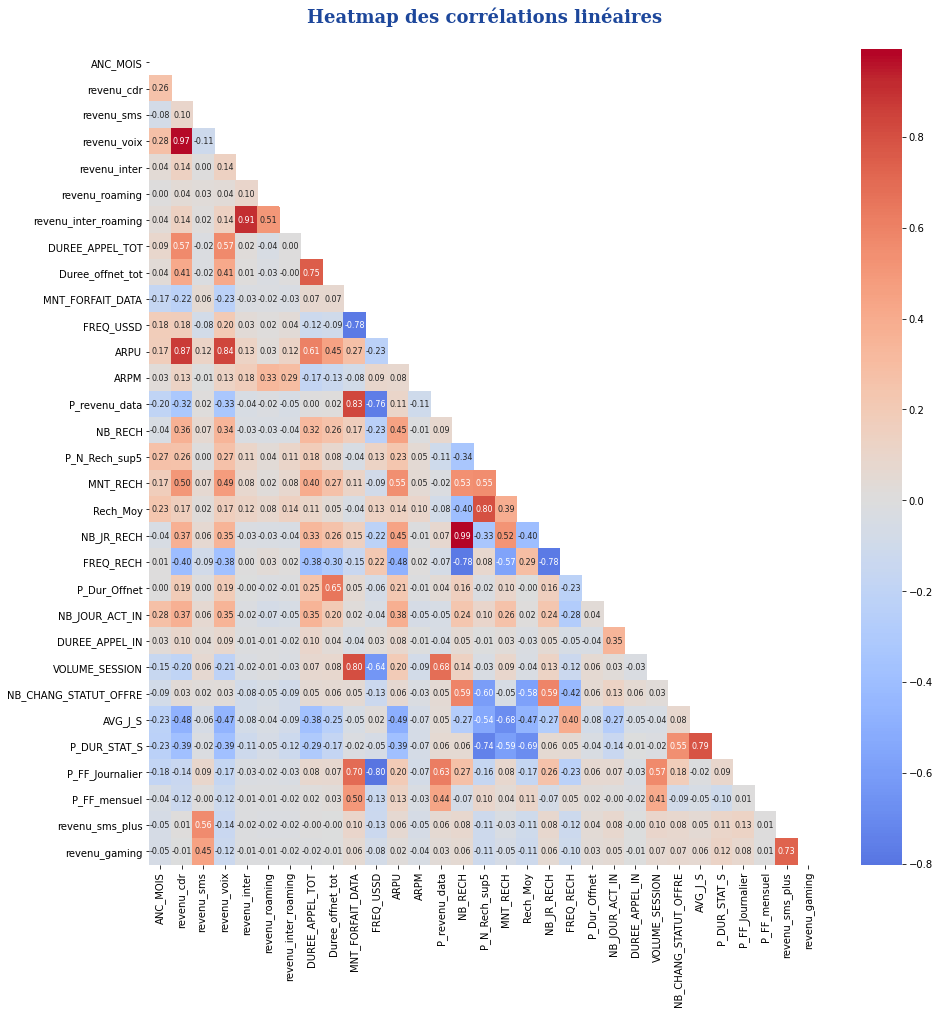

In [125]:
corr = data_dfcopy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

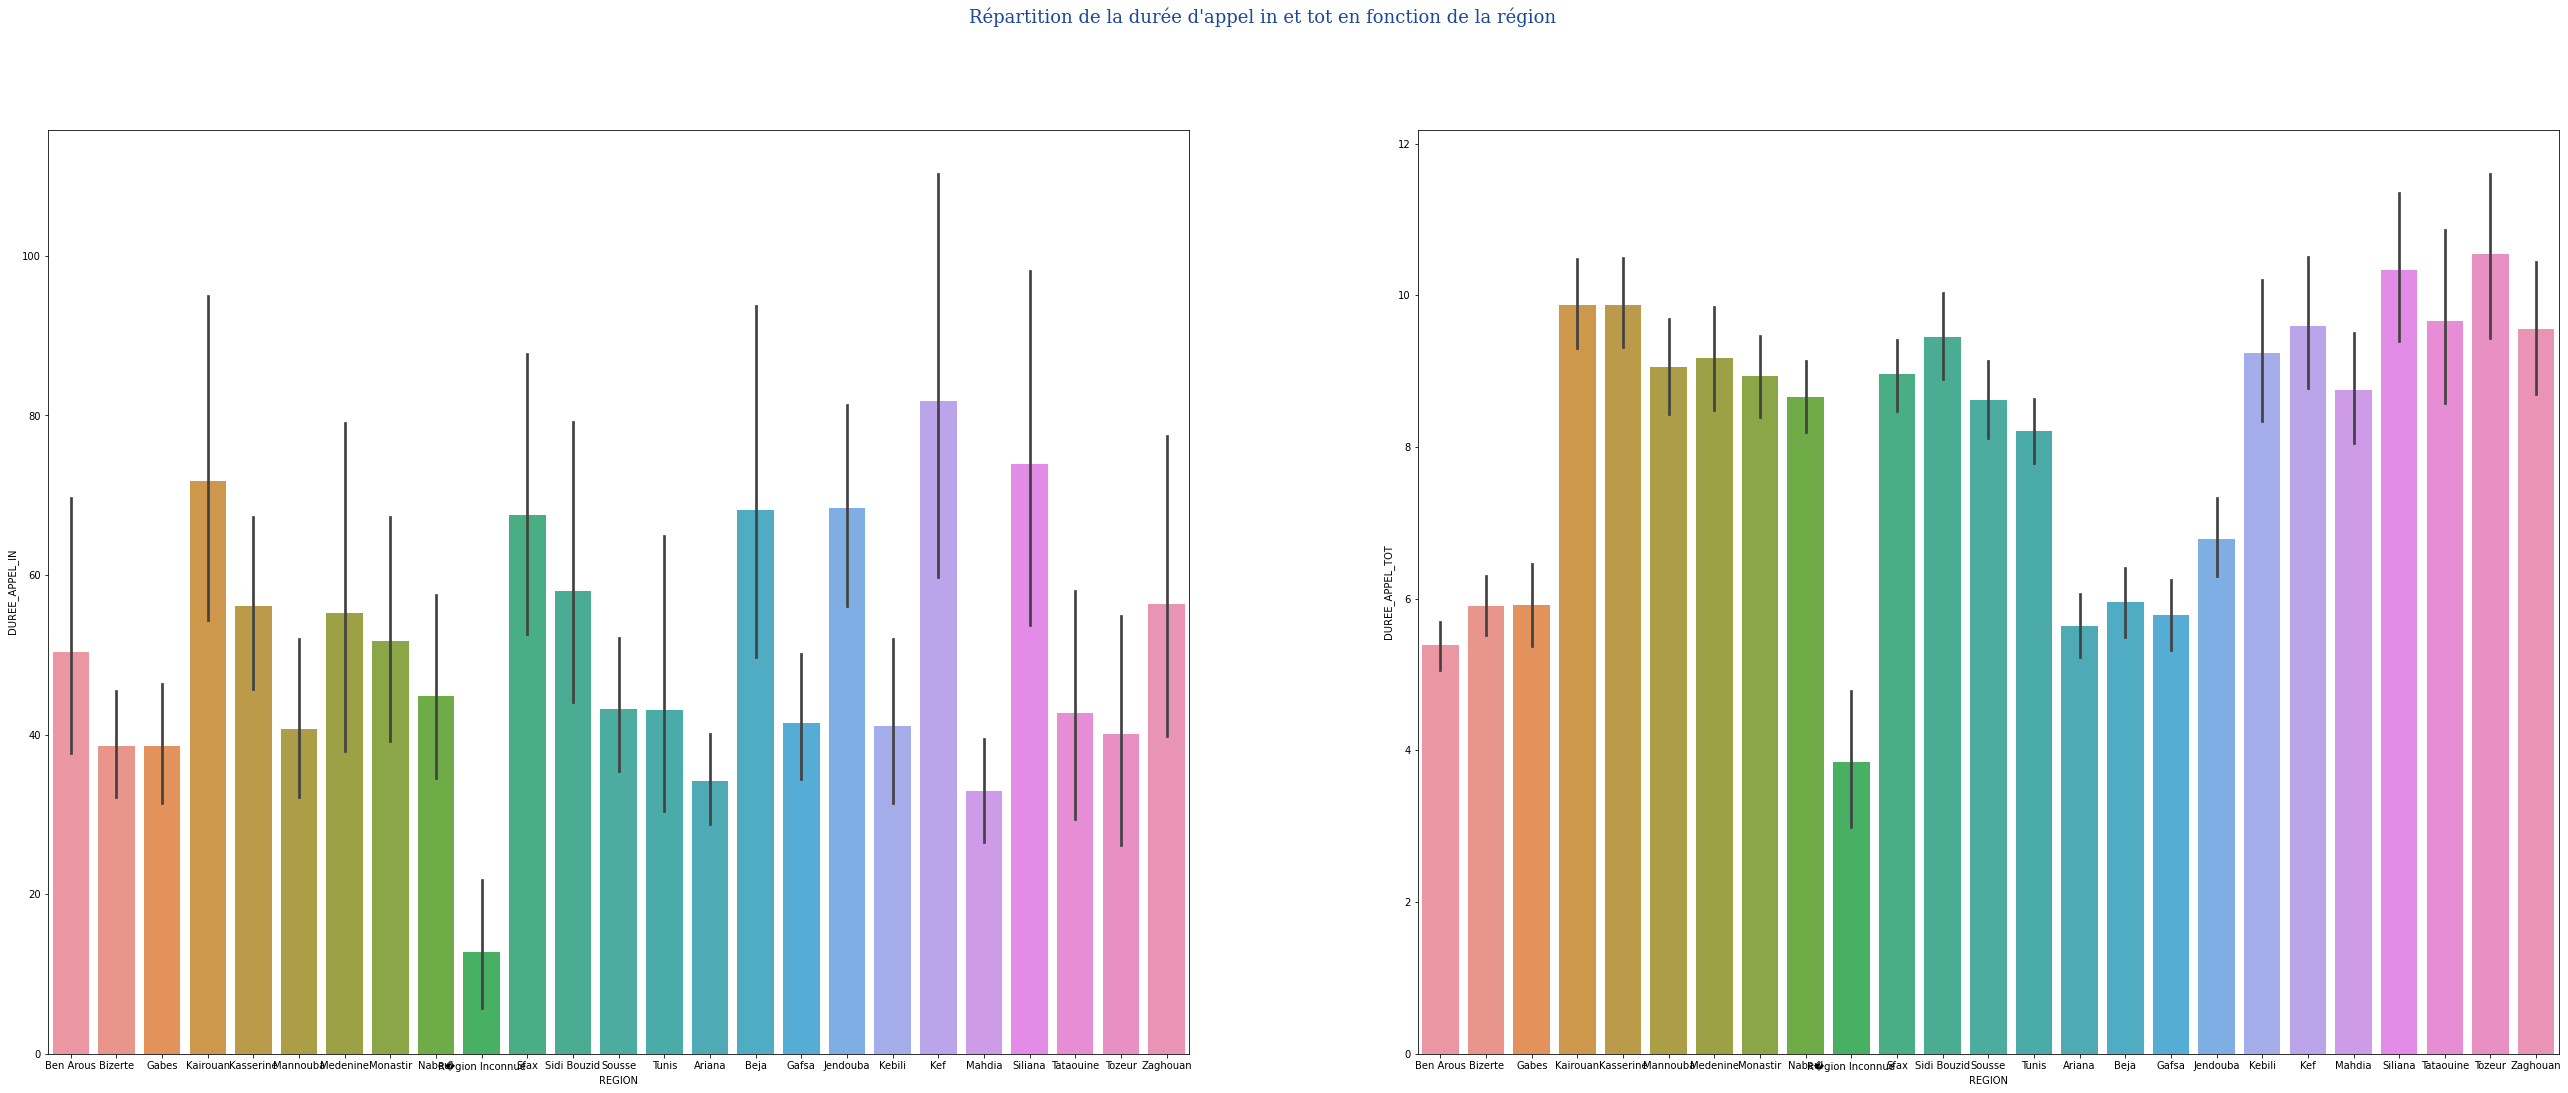

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(45,17))
sns.barplot(x='REGION',y='DUREE_APPEL_IN',data=data_dfcopy, ax=axes[0])
sns.barplot(x='REGION',y='DUREE_APPEL_TOT',data=data_dfcopy, ax=axes[1])
plt.suptitle("Répartition de la durée d'appel in et tot en fonction de la région", 
             fontdict=font_title, fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

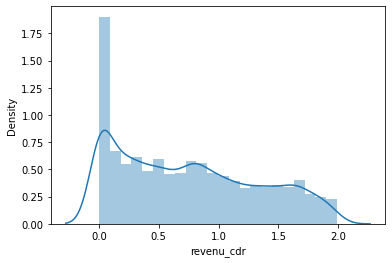

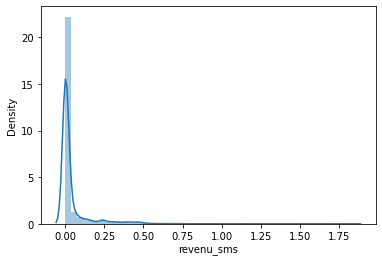

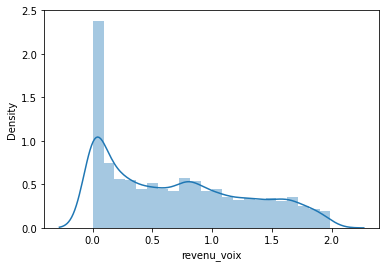

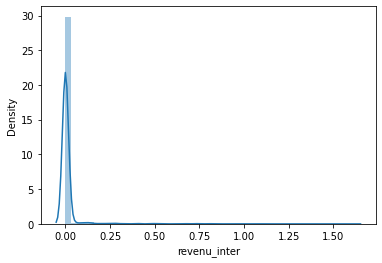

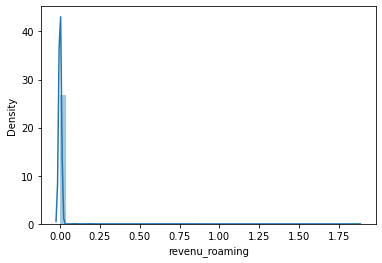

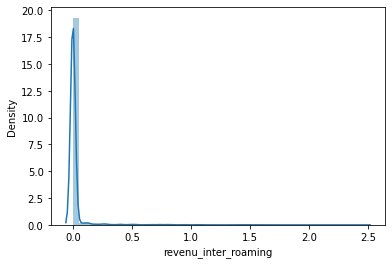

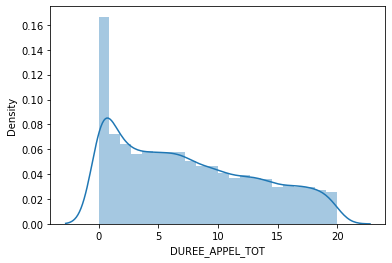

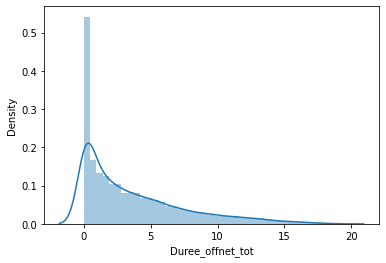

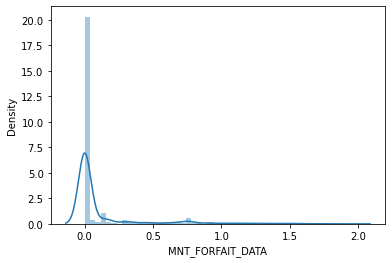

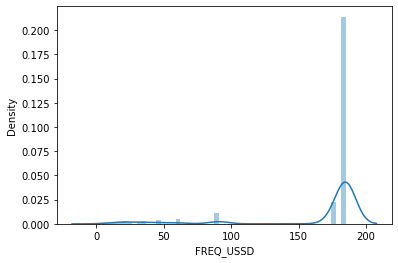

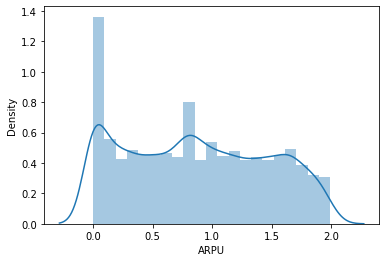

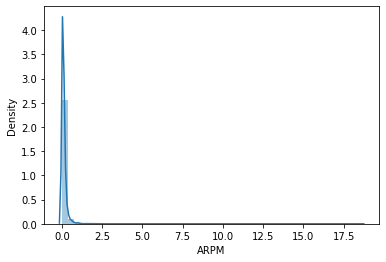

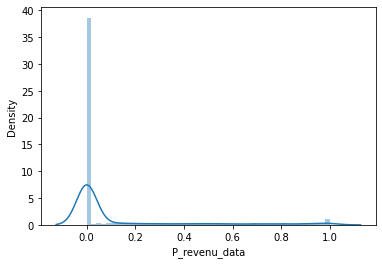

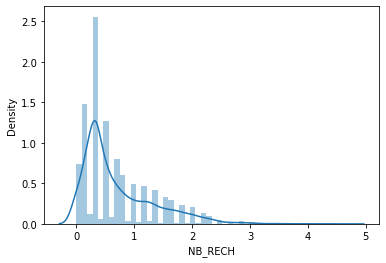

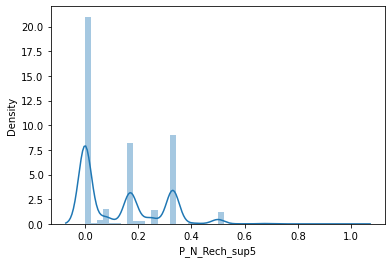

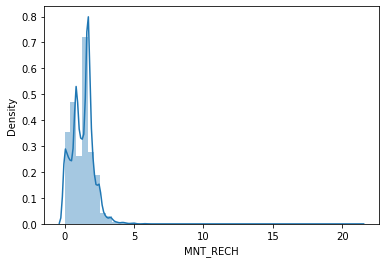

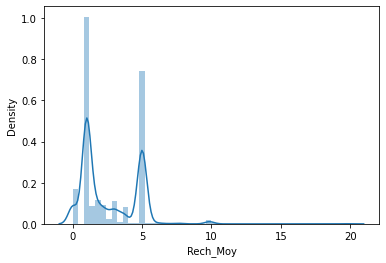

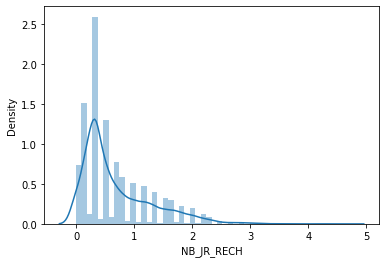

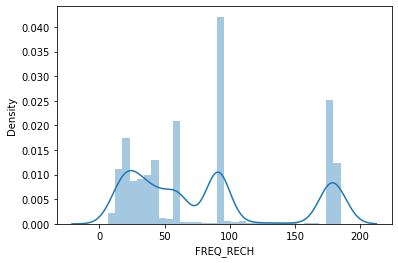

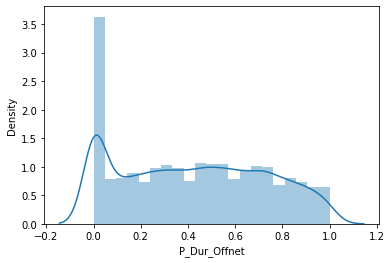

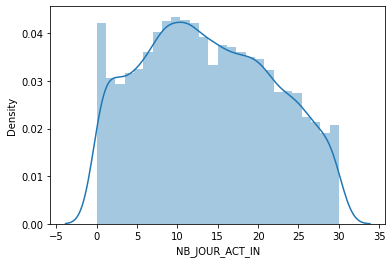

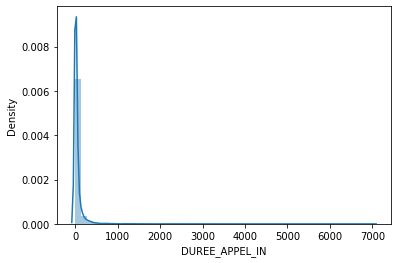

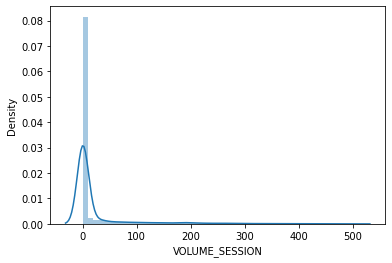

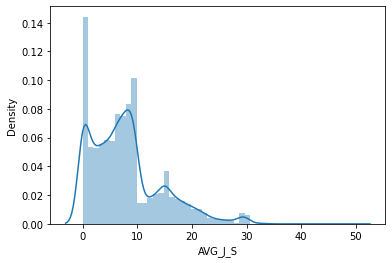

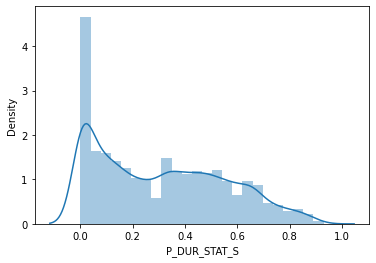

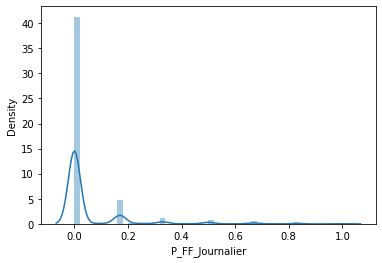

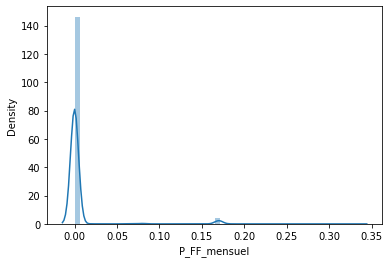

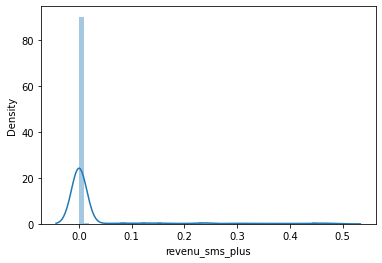

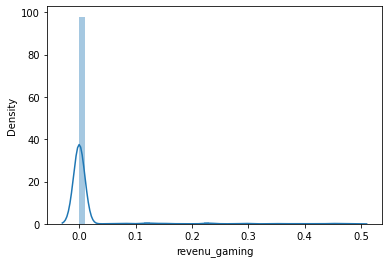

In [142]:
for col in data_dfcopy.select_dtypes('float64'):
    plt.figure()
    sns.distplot(data_dfcopy[col])

**Prétraitement des données**

Valeurs manquantes

In [6]:
data_dfcopy = data_dfcopy.drop('CODE_CONTRAT' , axis = 1)

In [7]:
mean = data_dfcopy['ARPM'].mean()
data_dfcopy['ARPM'].fillna(mean , inplace = True)

In [8]:
data_dfcopy['groupe_offre'].fillna( value = 'Offre à bonus' , inplace = True)

In [9]:
data_dfcopy['role'].fillna( value = 'Member' , inplace = True)

Outliers

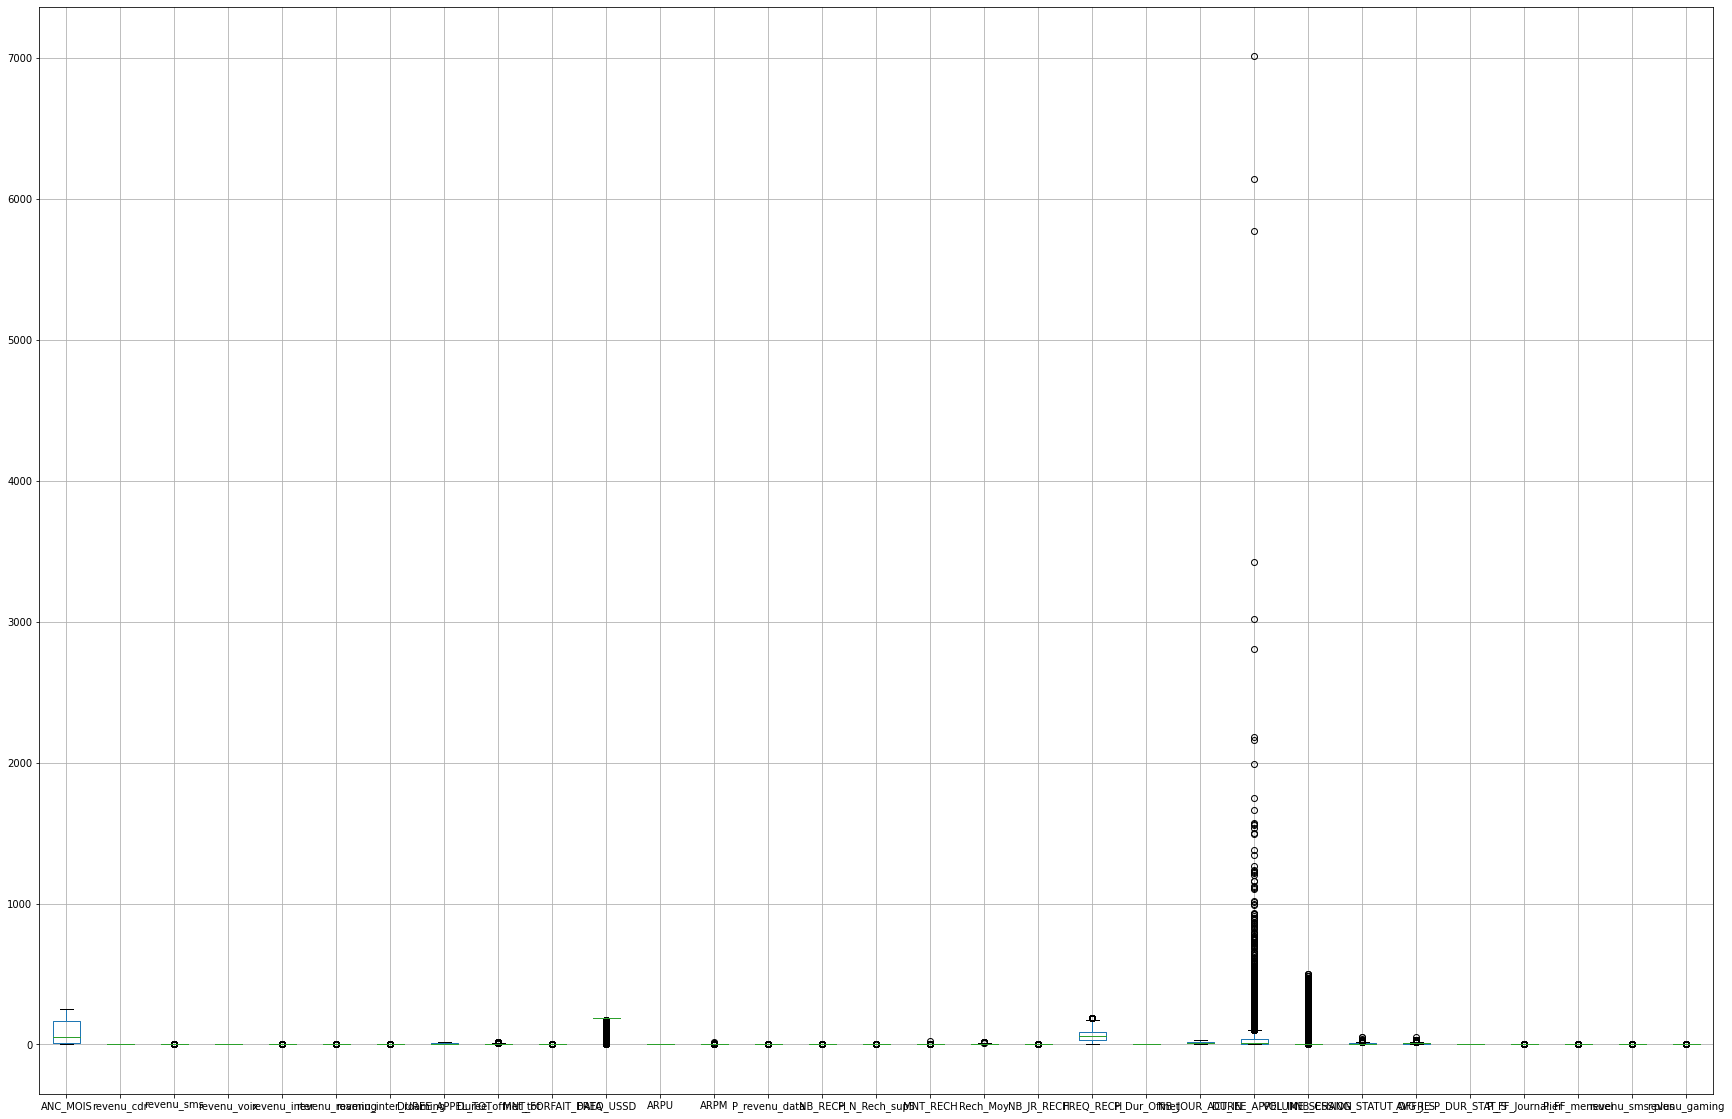

In [9]:
data_dfcopy.boxplot(figsize=(30,20))

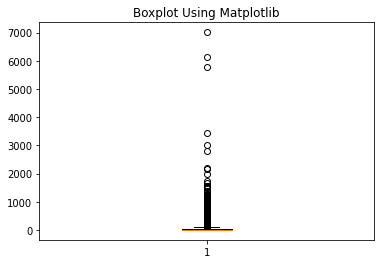

In [10]:
plt.boxplot(data_dfcopy['DUREE_APPEL_IN'])
plt.title("Boxplot Using Matplotlib")
plt.show()

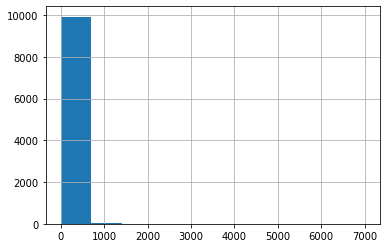

In [66]:
data_dfcopy['DUREE_APPEL_IN'].hist()

In [ ]:
#Q1= data_dfcopy.DUREE_APPEL_IN.quantile(0.25)
#Q3= data_dfcopy.DUREE_APPEL_IN.quantile(0.75)
#IQR= Q3 - Q1
#limite_inf = Q1 - 1.5*IQR
#limite_sup = Q3 + 1.5*IQR
#out=data_dfcopy[(data_dfcopy.DUREE_APPEL_IN<limite_inf) | (data_dfcopy.DUREE_APPEL_IN>limite_sup)] 
#out.shape


(1155, 36)

In [10]:
def suppr_outlr (df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    limiteinf  = q1-1.5*iqr
    limitesup = q3+1.5*iqr
    df_out = df.loc[(df[col] > limiteinf) & (df[col] < limitesup)]
    return df_out

In [11]:
data_clean=suppr_outlr(data_dfcopy,'DUREE_APPEL_IN')
data_clean

,REGION,HANDSET,groupe_offre,OFFRE,ANC_MOIS,revenu_cdr,revenu_sms,revenu_voix,revenu_inter,revenu_roaming,revenu_inter_roaming,DUREE_APPEL_TOT,Duree_offnet_tot,MNT_FORFAIT_DATA,FREQ_USSD,ARPU,ARPM,P_revenu_data,NB_RECH,P_N_Rech_sup5,MNT_RECH,Rech_Moy,NB_JR_RECH,FREQ_RECH,P_Dur_Offnet,NB_JOUR_ACT_IN,DUREE_APPEL_IN,role,VOLUME_SESSION,NB_CHANG_STATUT_OFFRE,AVG_J_S,P_DUR_STAT_S,P_FF_Journalier,P_FF_mensuel,revenu_sms_plus,revenu_gaming
0,Ben Arous,2G,Offre à bonus,PRE - TT 1000%,74,0.94,0.25,0.69,0.0,0.0,0.0,1.66,0.00,0.00,185.00,0.94,0.420000,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.00,10.333,0.960,Member,0.00,0,0.00,0.00,0.0,0.00,0.00,0.0
1,Ben Arous,4G,35mil/min,PRE - Trankil TT,241,1.09,0.32,0.77,0.0,0.0,0.0,15.98,2.92,0.75,176.47,1.84,0.050000,0.41,0.17,0.17,0.83,4.88,0.17,176.47,0.18,22.333,23.022,Follower,136.90,0,0.00,0.00,0.0,0.17,0.30,0.0
2,Ben Arous,4G,Offre à bonus,PRE - TT 1000%,61,0.33,0.00,0.33,0.0,0.0,0.0,1.68,1.63,0.00,185.00,0.33,0.200000,0.00,0.33,0.00,0.33,1.00,0.33,90.91,0.97,8.667,0.322,Member,0.00,1,0.00,0.00,0.0,0.00,0.00,0.0
3,Bizerte,2G,Offre à bonus,PRE - Oulidha 1000%,76,1.21,0.00,0.84,0.0,0.0,0.0,6.01,4.21,0.00,185.00,1.21,0.140000,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.70,24.500,51.518,Member,0.00,0,0.00,0.00,0.0,0.00,0.34,0.0
4,Gabes,4G,Offre à bonus,PRE - TT 1500%,152,0.11,0.00,0.11,0.0,0.0,0.0,2.59,2.59,0.00,185.00,0.11,0.040000,0.00,0.17,0.00,0.17,1.00,0.17,176.47,1.00,1.833,9.910,Member,0.01,1,0.00,0.00,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Jendouba,4G,35mil/min,PRE - Trankil TT,22,0.00,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00,185.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,185.00,0.00,0.333,0.000,Member,0.00,6,19.14,0.74,0.0,0.00,0.00,0.0
9995,Jendouba,4G,35mil/min,PRE - Trankil TT,11,0.18,0.00,0.18,0.0,0.0,0.0,4.88,4.82,0.00,185.00,0.18,0.040000,0.00,0.33,0.00,0.33,1.00,0.17,176.47,0.99,0.167,0.000,Member,0.00,3,20.00,0.44,0.0,0.00,0.00,0.0
9996,Jendouba,4G,35mil/min,PRE - Jawhara 35Mil,10,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,185.00,0.00,0.131296,0.00,0.00,0.00,0.00,0.00,0.00,185.00,0.00,2.000,0.000,Member,0.00,3,20.25,0.45,0.0,0.00,0.00,0.0
9998,Jendouba,4G,Hayya,Hayya,114,0.71,0.00,0.71,0.0,0.0,0.0,9.12,3.15,0.00,185.00,0.71,0.080000,0.00,0.17,0.17,0.83,4.88,0.17,176.47,0.35,2.500,2.395,Outlier,0.00,3,15.00,0.33,0.0,0.00,0.00,0.0


In [69]:
data_clean.shape

(8845, 36)

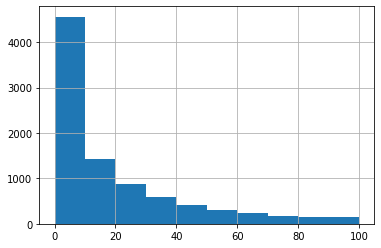

In [70]:
data_clean['DUREE_APPEL_IN'].hist()

In [42]:
data_cleandrop = data_clean.copy()



**ACP**

In [43]:
data_cleandrop = data_cleandrop.drop('OFFRE' , axis = 1)
data_cleandrop = data_cleandrop.drop('REGION' , axis = 1)
#nombre d'observations
n = data_cleandrop.shape[0]
#nombre de variables
p = data_cleandrop.shape[1]

encodage

In [44]:
def encodage (df):
  code = {'2G':0,
        '3G':1,
        '4G':2,
        'Member':0,
        'Follower':1,
        'Outlier':2,
        'Leader':3,
        'Bridge':4,
        'Offre à bonus':0,
        'ancien':1,
        'offre-300%':2,
        '35mil/min':3,
        'Hayya':4
      }
  for col in df.select_dtypes('object').columns:
      df.loc[:,col] = df[col].map(code)
  return df

In [45]:
data_cleandrop = encodage(data_cleandrop)


In [46]:
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(data_cleandrop)
print(Z)


[[-0.9617892  -0.82474741 -0.11198739 ... -0.1859036  -0.31329137
  -0.21826279]
 [ 1.20339926  1.54269877  1.93412862 ...  5.33411916  2.97294279
  -0.21826279]
 [ 1.20339926 -0.82474741 -0.27126588 ... -0.1859036  -0.31329137
  -0.21826279]
 ...
 [ 1.20339926  1.54269877 -0.89612765 ... -0.1859036  -0.31329137
  -0.21826279]
 [ 1.20339926  2.3318475   0.37810028 ... -0.1859036  -0.31329137
  -0.21826279]
 [ 1.20339926  2.3318475  -0.58982286 ... -0.1859036  -0.31329137
  -0.21826279]]


Vérifions, par acquit de conscience, les propriétés du nouvel ensemble de données. Les
moyennes sont maintenant nulles (aux erreurs de troncature près) :


In [47]:
#moyenne
print(np.mean(Z,axis=0))

[ 6.26595064e-17  8.03327005e-18  6.42661604e-18 -7.71193925e-17
  3.61497152e-17 -1.28532321e-17  3.53463882e-17  1.28532321e-17
 -3.37397342e-17 -2.05651713e-16 -9.63992406e-17 -1.92798481e-17
 -5.91248676e-16 -5.14129283e-17  3.17314167e-17  1.18892397e-16
  1.02825857e-16 -1.02825857e-16 -7.71193925e-17 -6.42661604e-17
 -9.63992406e-17 -2.57064642e-17  1.83158557e-16 -2.57064642e-17
 -3.21330802e-17 -3.21330802e-18 -6.42661604e-18 -5.30195823e-17
 -1.28532321e-16 -1.15679089e-16  0.00000000e+00 -5.78395443e-17
  1.76731941e-17  3.21330802e-17]


Et les écarts-type unitaires

In [48]:
#écart-type
print(np.std(Z,axis=0,ddof=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


prét à lancer l'ACP

In [49]:
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [50]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

34


Valeurs propres et scree plot


In [51]:
#variance expliquée (valeurs propres, λk) 
print(acp.explained_variance_)

[6.49790950e+00 5.07573834e+00 3.71265194e+00 2.25549266e+00
 2.11305076e+00 1.69422481e+00 1.61951928e+00 1.18093476e+00
 1.04192966e+00 1.02794561e+00 9.51647024e-01 8.62378445e-01
 7.31454955e-01 6.82525773e-01 6.16322863e-01 5.48756613e-01
 4.86969673e-01 4.37391315e-01 3.93199817e-01 3.39320710e-01
 3.20509232e-01 3.03665981e-01 2.58544965e-01 2.22077085e-01
 1.50350150e-01 1.46571863e-01 1.05622411e-01 9.72551602e-02
 6.36904942e-02 5.31364177e-02 5.92131664e-03 5.56664203e-03
 1.56820299e-03 4.23267836e-32]


In [52]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[6.49717486e+00 5.07516448e+00 3.71223220e+00 2.25523765e+00
 2.11281186e+00 1.69403326e+00 1.61933618e+00 1.18080124e+00
 1.04181186e+00 1.02782939e+00 9.51539432e-01 8.62280946e-01
 7.31372258e-01 6.82448608e-01 6.16253183e-01 5.48694571e-01
 4.86914617e-01 4.37341865e-01 3.93155363e-01 3.39282347e-01
 3.20472996e-01 3.03631649e-01 2.58515734e-01 2.22051977e-01
 1.50333152e-01 1.46555291e-01 1.05610470e-01 9.72441647e-02
 6.36832934e-02 5.31304102e-02 5.92064719e-03 5.56601268e-03
 1.56802569e-03 4.23219982e-32]


In [53]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[1.91093378e-01 1.49269544e-01 1.09183300e-01 6.63305192e-02
 6.21415252e-02 4.98245077e-02 4.76275348e-02 3.47294483e-02
 3.06415253e-02 3.02302762e-02 2.79864539e-02 2.53612043e-02
 2.15109488e-02 2.00720179e-02 1.81250936e-02 1.61380756e-02
 1.43210182e-02 1.28629960e-02 1.15633930e-02 9.97889256e-03
 9.42567636e-03 8.93034263e-03 7.60340394e-03 6.53094050e-03
 4.42156329e-03 4.31044975e-03 3.10619028e-03 2.86012249e-03
 1.87303804e-03 1.56265912e-03 1.74136682e-04 1.63706255e-04
 4.61184026e-05 1.24476465e-33]


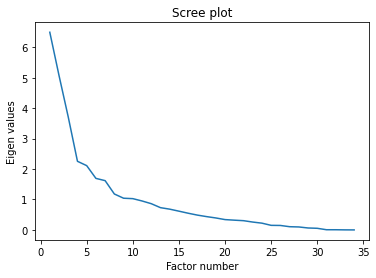

In [57]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


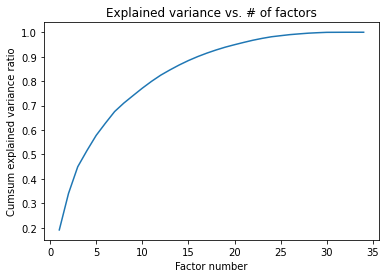

In [58]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [59]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


In [64]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


      Val.Propre    Seuils
0   6.497175e+00  4.118210
1   5.075164e+00  3.118210
2   3.712232e+00  2.618210
3   2.255238e+00  2.284877
4   2.112812e+00  2.034877
5   1.694033e+00  1.834877
6   1.619336e+00  1.668210
7   1.180801e+00  1.525353
8   1.041812e+00  1.400353
9   1.027829e+00  1.289242
10  9.515394e-01  1.189242
11  8.622809e-01  1.098333
12  7.313723e-01  1.014999
13  6.824486e-01  0.938076
14  6.162532e-01  0.866648
15  5.486946e-01  0.799981
16  4.869146e-01  0.737481
17  4.373419e-01  0.678657
18  3.931554e-01  0.623102
19  3.392823e-01  0.570470
20  3.204730e-01  0.520470
21  3.036316e-01  0.472851
22  2.585157e-01  0.427397
23  2.220520e-01  0.383918
24  1.503332e-01  0.342252
25  1.465553e-01  0.302252
26  1.056105e-01  0.263790
27  9.724416e-02  0.226753
28  6.368329e-02  0.191039
29  5.313041e-02  0.156556
30  5.920647e-03  0.123223
31  5.566013e-03  0.090965
32  1.568026e-03  0.059715
33  4.232200e-32  0.029412


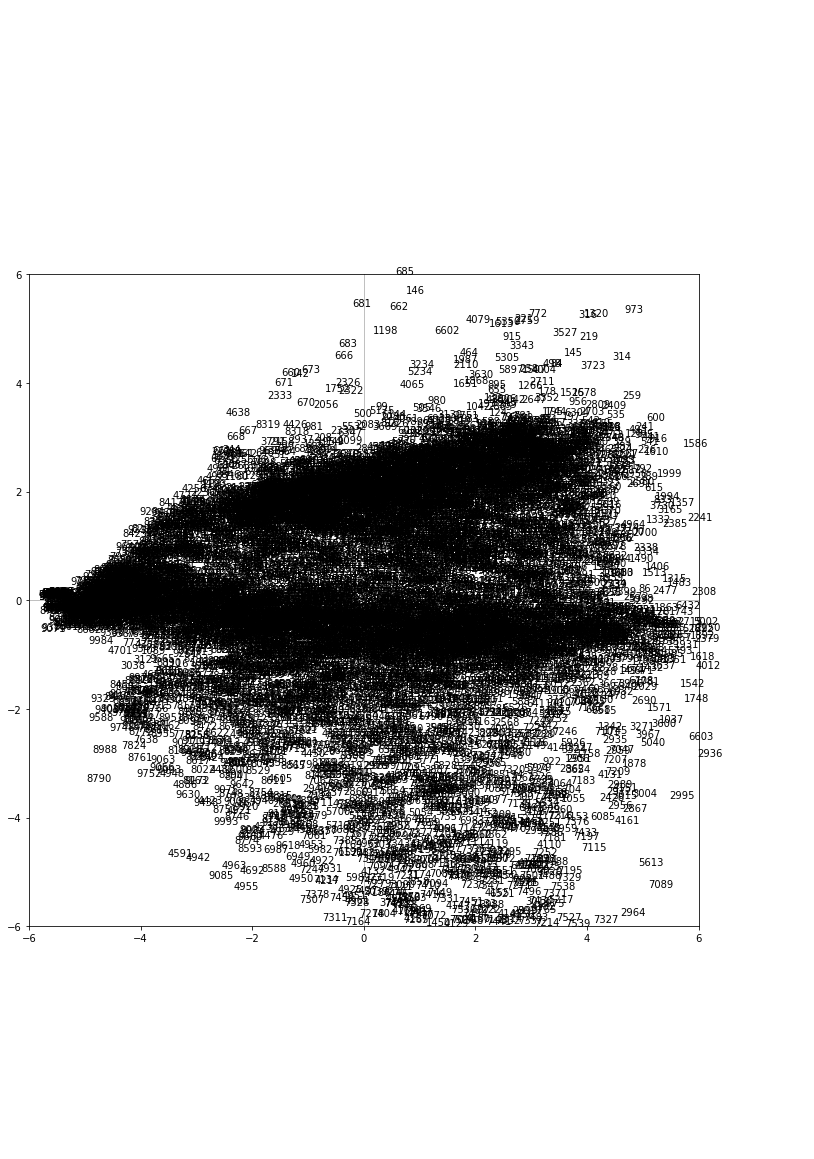

In [66]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data_cleandrop.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [69]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data_cleandrop.index,'d_i':di}))

        ID        d_i
0        0  21.317847
1        1  77.060598
2        2  18.117590
3        3  31.681594
4        4  25.870327
...    ...        ...
8840  9994  35.204371
8841  9995  26.484911
8842  9996  32.732308
8843  9998  20.274706
8844  9999  24.885418

[8845 rows x 2 columns]


In [71]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data_cleandrop.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1    COS2_2
0        0  0.062376  0.289000
1        1  0.026771  0.003457
2        2  0.147659  0.028885
3        3  0.015498  0.136313
4        4  0.241337  0.044609
...    ...       ...       ...
8840  9994  0.810749  0.002965
8841  9995  0.486492  0.000124
8842  9996  0.814755  0.000162
8843  9998  0.140690  0.103699
8844  9999  0.608859  0.000607

[8845 rows x 3 columns]


In [72]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))


[1. 1. 1. ... 1. 1. 1.]


In [79]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':data_cleandrop.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))


        id     CTR_1         CTR_2
0        0  0.000023  1.372440e-04
1        1  0.000036  5.935345e-06
2        2  0.000047  1.165792e-05
3        3  0.000009  9.620504e-05
4        4  0.000109  2.570850e-05
...    ...       ...           ...
8840  9994  0.000497  2.325465e-06
8841  9995  0.000224  7.326273e-08
8842  9996  0.000464  1.180071e-07
8843  9998  0.000050  4.683602e-05
8844  9999  0.000264  3.365452e-07

[8845 rows x 3 columns]


In [80]:
#vérifions la théorie
print(np.sum(ctr,axis=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Représentation des variables – Outils pour l’aide à l’interprétation

In [81]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[-2.08173060e-02 -6.78025015e-02  9.37502066e-02 ...  9.47613600e-03
   1.41107050e-02  2.15469968e-03]
 [-1.14310177e-01 -1.06275481e-02  1.56124519e-01 ... -9.83093743e-02
  -1.15631768e-01 -9.86643776e-02]
 [ 1.76954343e-01  1.56928214e-02  6.21041134e-03 ...  2.38091480e-01
  -3.69728218e-02 -4.91276387e-02]
 ...
 [ 4.02988881e-03  3.30063490e-03 -5.84896752e-04 ... -9.19024490e-03
  -3.88487157e-02  1.08972707e-02]
 [ 9.72909617e-04 -5.45995294e-04 -2.39908170e-03 ... -1.34004597e-03
   4.02215916e-02 -1.19424574e-02]
 [-0.00000000e+00 -2.19154292e-16  1.24306216e-16 ...  7.29575994e-16
  -5.15550412e-16 -4.94636539e-16]]


In [82]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [83]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[-5.30623896e-02 -2.57519404e-01  3.40940656e-01 ...  3.00652735e-04
   3.85255709e-05 -0.00000000e+00]
 [-1.72825569e-01 -2.39418739e-02  3.02356005e-02 ...  2.46246226e-04
  -2.16204877e-05 -4.50851025e-32]
 [ 2.38965118e-01  3.51719280e-01  1.19656951e-02 ... -4.36366403e-05
  -9.49995667e-05  2.55726615e-32]
 ...
 [ 2.41542503e-02 -2.21472594e-01  4.58734518e-01 ... -6.85644790e-04
  -5.30635480e-05  1.50090643e-31]
 [ 3.59675610e-02 -2.60496701e-01 -7.12361049e-02 ... -2.89833621e-03
   1.59270682e-03 -1.06060634e-31]
 [ 5.49223390e-03 -2.22272350e-01 -9.46549776e-02 ...  8.12998671e-04
  -4.72901060e-04 -1.01758167e-31]]


In [85]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data_cleandrop.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))


                       id     COR_1     COR_2
0                 HANDSET -0.053062 -0.257519
1            groupe_offre -0.172826 -0.023942
2                ANC_MOIS  0.238965  0.351719
3              revenu_cdr  0.809201  0.328433
4              revenu_sms  0.080276 -0.126202
5             revenu_voix  0.787427  0.364081
6            revenu_inter  0.115572  0.184540
7          revenu_roaming  0.012972  0.121335
8    revenu_inter_roaming  0.105013  0.210666
9         DUREE_APPEL_TOT  0.718507  0.005438
10       Duree_offnet_tot  0.582257 -0.049963
11       MNT_FORFAIT_DATA  0.142369 -0.732928
12              FREQ_USSD -0.161140  0.754415
13                   ARPU  0.867641 -0.054910
14                   ARPM  0.027450  0.186441
15          P_revenu_data -0.004153 -0.715930
16                NB_RECH  0.629507 -0.463678
17          P_N_Rech_sup5  0.303957  0.569162
18               MNT_RECH  0.760118  0.116335
19               Rech_Moy  0.175108  0.570057
20             NB_JR_RECH  0.63223

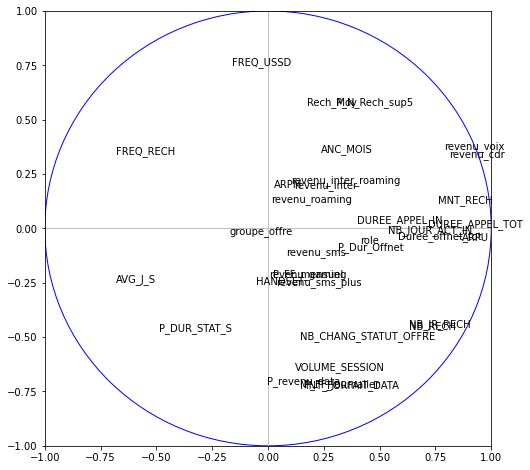

In [92]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data_cleandrop.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

**CAH Kmeans**